# Polynomial Regression Implementation

In [12]:
#import requried lib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


In [13]:
#Load data set
data = pd.read_csv('claim_per_policy.csv')
data

,Age,Claim per policy
0,15,31177
1,20,34086
2,25,36867
3,30,42452
4,35,44681
5,40,46986
6,45,46033
7,50,47341
8,55,48762
9,60,52408


In [14]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
a = data.Age
b = data['Claim per policy']
print(type(a),type(b))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


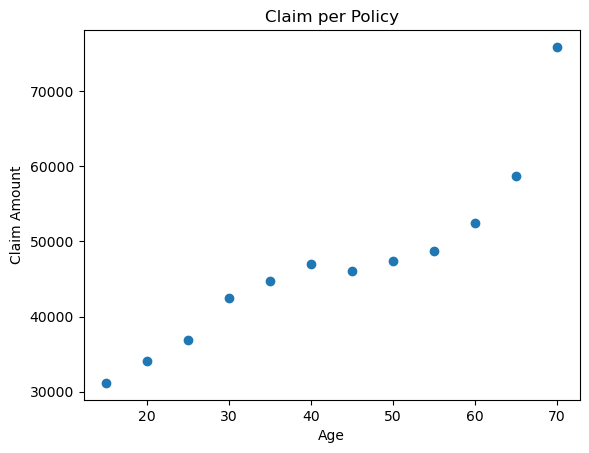

In [16]:
#visualize dataset
plt.scatter(x,y)
plt.title('Claim per Policy')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

# Build base regression model

In [48]:
 #Simpole Linear regression for the entire dataset (for comparision)
from sklearn.linear_model import LinearRegression
base_reg = LinearRegression()
base_reg.fit(x,y)
print("Cofficient:  ",base_reg.coef_)
print()
print('Intercept:\t',base_reg.intercept_)

Cofficient:   [[601.90769231]]

Intercept:	 [21534.75641026]


# Polynomial based linear regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree= 2)
x_poly = poly_features.fit_transform(x)
y_poly = poly_features.fit_transform(y)

#call l;inear regression and agign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(x_poly,y)
print("Cofficient:  ",poly_reg.coef_)
print()
print('Intercept:\t',poly_reg.intercept_)

Cofficient:   [[  0.         -95.94485514   8.21002997]]

Intercept:	 [33918.21828172]


In [50]:
x

array([[15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70]], dtype=int64)

In [51]:
y

array([[31177],
       [34086],
       [36867],
       [42452],
       [44681],
       [46986],
       [46033],
       [47341],
       [48762],
       [52408],
       [58741],
       [75856]], dtype=int64)

In [52]:
x_poly


array([[1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 7.000e+01, 4.900e+03]])

In [53]:
x_poly.shape

(12, 3)

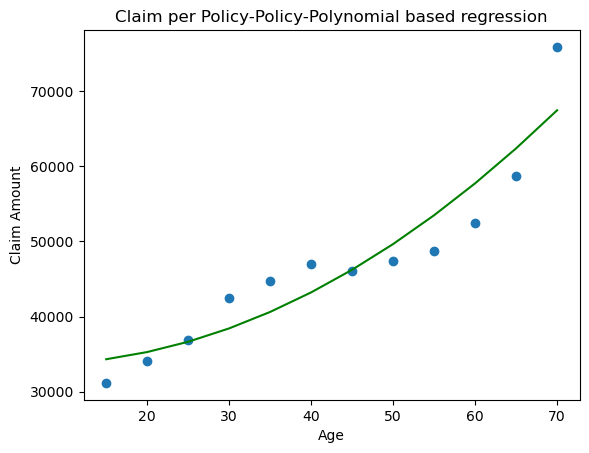

In [54]:
#visualize dataset
plt.scatter(x,y)
plt.plot(x,poly_reg.predict(x_poly),color='green')
plt.title('Claim per Policy-Policy-Polynomial based regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

Cofficient:   [[ 0.00000000e+00 -3.41993985e+03  2.01152658e+02 -3.84457571e+00
   1.99421971e-02  7.14358721e-05]]

Intercept:	 [49119.50741093]


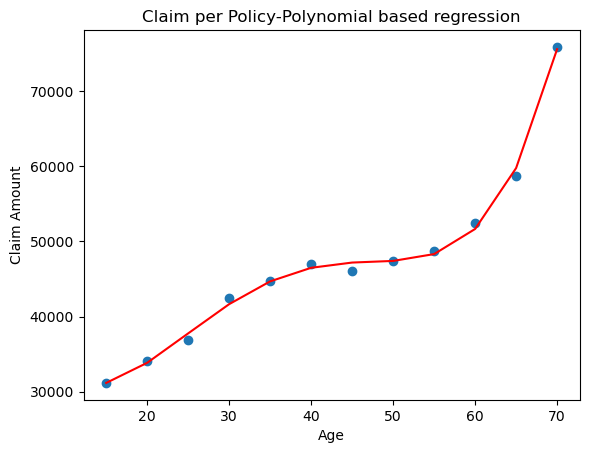

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree= 5)
x_poly = poly_features.fit_transform(x)
y_poly = poly_features.fit_transform(y)

#call l;inear regression and agign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(x_poly,y)
print("Cofficient:  ",poly_reg.coef_)
print()
print('Intercept:\t',poly_reg.intercept_)

#visualize dataset
plt.scatter(x,y)
plt.plot(x,poly_reg.predict(x_poly),color='red')
plt.title('Claim per Policy-Polynomial based regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

# Predict with Polynomial regression for any Age

In [56]:
poly_pred = poly_reg.predict(poly_features.fit_transform(np.array([[int(input('Age p1:'))]])))
print()
print('Predicted Claim Amout:\t',poly_pred)

Age p1:67

Predicted Claim Amout:	 [[64956.68254429]]


In [57]:
base_pred=base_reg.predict(np.array([[int(input('Age :\t'))]]))
print()
print('Predicted claim amouint by bse regression;\t',base_pred)

Age :	67

Predicted claim amouint by bse regression;	 [[61862.57179487]]
